In [1]:
import sys
!{sys.executable} -m pip install mariadb

^C


## Connect to NAS db and plot sensor data 

In [8]:
import mariadb
import sys 

# Connect to MariaDB Platform
try: conn = mariadb.connect( 
    user="rootz2", 
    password="EEE333eee___", 
    host="192.168.188.11", 
    port=3307, 
    database="FB_HA_2020")
except mariadb.Error as e: 
    print(f"Error connecting to MariaDB Platform: {e}") 
    sys.exit(1) 

# Get Cursor 
cur = conn.cursor()

c:\users\fabio\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


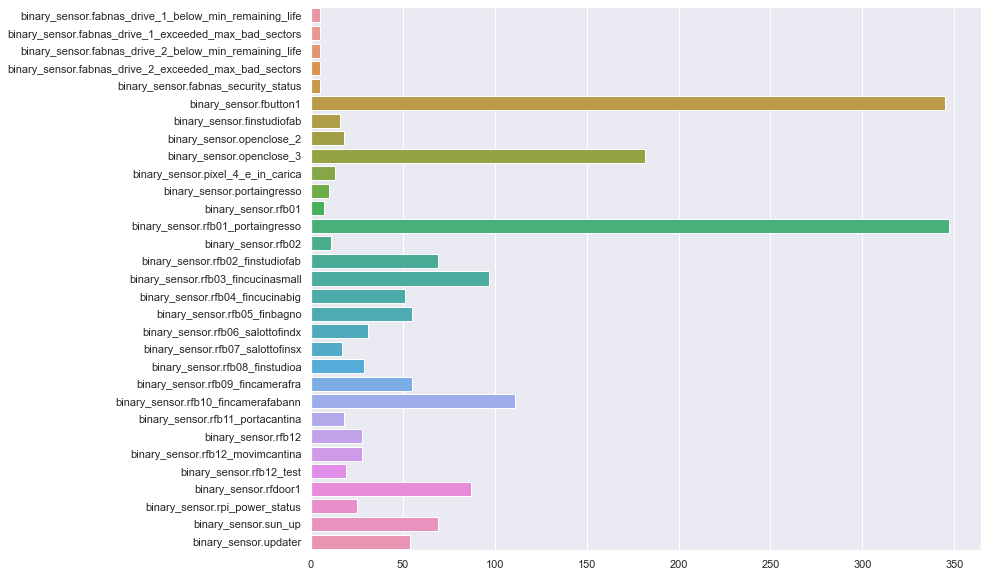

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

cur.execute('SELECT count(1) TOT,entity_id FROM states WHERE domain="binary_sensor" GROUP BY entity_id')
output = cur.fetchall()

x = [] 
y = [] 
for row in output:
    #print(row)
    y.append(row[0]) 
    x.append(row[1]) 

sns.set(rc={'figure.figsize':(12,10)})
ax = sns.barplot(y, x)
plt.show()

## database tables and size 

In [4]:
cur.execute('SELECT count(TABLE_NAME), sum((DATA_LENGTH+INDEX_LENGTH)/1024/1024/1024) AS TABLE_SIZE_in_MB FROM information_schema.TABLES where table_schema = "FB_HA_2020"')
output = cur.fetchall()
for row in output:
    print(row)


(6, Decimal('0.130844116211'))


# TESTS BELOW

## Read from database 

In [9]:
cur.execute("SELECT * from HA_EVENTS")
output = cur.fetchall()

for row in output:
    #print(row[1],row[2])
    print(row)
    lastrow= row[0]
print(lastrow)
print("-"*20)

#lastrow

cur.execute("SELECT max(ID_EVENT) from HA_EVENTS")
output = cur.fetchall()
for row in output:
        lastrow= row[0]
print(lastrow)


(1, 1, datetime.date(2020, 11, 8), 'ALARM CAMERA', '1')
(2, 1, datetime.date(2020, 11, 8), 'ALARM CAMERA', '2')
(3, 1, datetime.date(2020, 11, 8), 'ALARM CAMERA', '3')
(4, 2, datetime.date(2020, 11, 8), 'ALARM CAMERA', '3')
(5, 1, datetime.date(2020, 11, 8), 'ALARM CAMERA', '3')
(6, 3, datetime.date(2020, 11, 8), 'PORTA INGRESSO', '4')
(7, 4, datetime.date(2020, 11, 8), 'CANTINA', 'CANTINA')
(8, 3, datetime.date(2020, 11, 8), 'PORTA INGRESSO', '4')
(9, 4, datetime.date(2020, 11, 9), 'CANTINA', 'CANTINA')
(11, 3, datetime.date(2020, 11, 15), 'PORTA INGRESSO', '4')
(12, 3, datetime.date(2020, 11, 15), 'PORTA INGRESSO', '4')
(13, 3, datetime.date(2020, 11, 15), 'PORTA INGRESSO', '4')
(14, 3, datetime.date(2020, 11, 15), 'PORTA INGRESSO', '4')
(15, 3, datetime.date(2020, 11, 15), 'PORTA INGRESSO', '4')
(16, 3, datetime.date(2020, 11, 8), 'PORTA INGRESSO', '4')
(17, 3, datetime.date(2020, 11, 8), 'PORTA INGRESSO', '4')
(18, 3, datetime.date(2020, 11, 8), 'PORTA INGRESSO', '4')
(19, 3, datet

In [190]:
cur.execute("SELECT DAY(DATA_EVENTO), count(1) EVENTI FROM HA_EVENTS GROUP BY DAY(DATA_EVENTO)")
output = cur.fetchall()

for row in output:
    print(row)
print("-"*20)

print(f"Last Inserted ID: {cur.lastrowid}")
print("-"*20)

(8, 19)
(9, 1)
(10, 1)
(13, 4)
(15, 5)
--------------------
Last Inserted ID: None
--------------------


## questo è ok 

In [7]:
import matplotlib.pyplot as plt

cur.execute("SELECT A.TIPO,DATA_EVENTO, count(1) EVENTI FROM ( SELECT * FROM `HA_EVENTS`,`HA_DEVICES` WHERE HA_EVENTS.ID_DEVICE=HA_DEVICES.ID) A GROUP BY A.TIPO,DATA_EVENTO")
output = cur.fetchall()

x = [] 
y = [] 
yIP= [] 
yMOV= [] 
yPOR= [] 
for row in output:
    #print(row)
    x.append(row[1]) 
    if row[0]=='IP CAM':
      yIP.append(row[2])   
    else:
        yIP.append(0)
    if row[0]=='SENSORE PIR MOVIMENTO':
      yMOV.append(row[2])   
    else:
        yMOV.append(0)
    if row[0]=='SENSORE PORTA':
      yPOR.append(row[2])   
    else:
        yPOR.append(0)
    
print(x,yIP,yMOV,yPOR)
print("-"*20)

x = date2num(x)

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
w = 0.3

ax.set_xlabel('Day')
ax.set_ylabel('Events')

ax.bar(x+w, yIP, width=w, color='b', align='center')
ax.bar(x, yMOV, width=w, color='g', align='center')
ax.bar(x-w, yPOR, width=w, color='r', align='center')
ax.xaxis_date()

ax.legend(labels=['yIP', 'yMOV', 'yPOR'])
ax.set_title('count per day')

plt.show()


[datetime.date(2020, 11, 8), datetime.date(2020, 11, 8), datetime.date(2020, 11, 9), datetime.date(2020, 11, 8), datetime.date(2020, 11, 10), datetime.date(2020, 11, 13), datetime.date(2020, 11, 15)] [5, 0, 0, 0, 0, 0, 0] [0, 1, 1, 0, 0, 0, 0] [0, 0, 0, 13, 1, 4, 5]
--------------------


NameError: name 'date2num' is not defined

## Add to table

In [126]:
import datetime

#get last record to create nexteventID
cur.execute("SELECT max(ID_EVENT) from HA_EVENTS")
output = cur.fetchall()
for row in output:
        lastrow= row[0]
print("records :"+ str(lastrow))
nexteventID = lastrow+1

try:
    CURRENT_DATE= datetime.date(2020, 11, 13)
    array_to_insert = (nexteventID, 3, CURRENT_DATE, 'PORTA INGRESSO', 4)
    print(array_to_insert)
    cur.execute('INSERT INTO HA_EVENTS VALUES (?,?,?,?,?)', array_to_insert)
except mariadb.Error as e:
    print(f"Error: {e}")
    
#get last record to create nexteventID
cur.execute("SELECT max(ID_EVENT) from HA_EVENTS")
output = cur.fetchall()
for row in output:
        lastrow= row[0]
print("records :"+ str(lastrow))
nexteventID = lastrow+1

conn.commit() 

records :30
(31, 3, datetime.date(2020, 11, 13), 'PORTA INGRESSO', 4)
records :31


## HASS local database analysis

In [5]:
import sqlite3
import pandas as pd
from IPython.display import display
databasename = 'home-assistant_v2.db'

conn = sqlite3.connect(databasename)
c = conn.cursor()
print('---- stats database '+databasename+' ----')
list_tables = []
for j in c.execute('''SELECT name FROM sqlite_master WHERE type='table' ORDER BY name'''):
    list_tables.append(j)

k=0
for i in list_tables:
    for rows in c.execute('SELECT count(1) FROM '+i[0] ):
        
        print(str(list_tables[k]),rows[0])
        k=k+1
        
        #cursor = conn.execute('select * from '+i[0] )
        #names = list(map(lambda x: x[0], cursor.description))
        #print(names)
        
        df = pd.read_sql_query('select * from '+i[0]+ ' limit 4', conn)
        display(df)
        
conn.commit()
conn.close()
print('-'*20)

---- stats database home-assistant_v2.db ----
('events',) 28419


,event_id,event_type,event_data,origin,time_fired,created,context_id,context_user_id,context_parent_id
0,3625,service_registered,"{""domain"": ""recorder"", ""service"": ""purge""}",LOCAL,2020-11-01 08:54:41.675552,2020-11-01 08:54:41.675552,dd185afb9b4d0bbcdfac56dd5aee8954,None,None
1,3626,component_loaded,"{""component"": ""http""}",LOCAL,2020-11-01 08:54:41.800222,2020-11-01 08:54:41.800222,1cb52a2f088de75427158a8ba8461106,None,None
2,3627,service_registered,"{""domain"": ""system_log"", ""service"": ""clear""}",LOCAL,2020-11-01 08:54:41.821665,2020-11-01 08:54:41.821665,2d44fb94538b2a6dcd9b7165872ccdb4,None,None
3,3628,service_registered,"{""domain"": ""system_log"", ""service"": ""write""}",LOCAL,2020-11-01 08:54:41.822073,2020-11-01 08:54:41.822073,1df7666f84f9ece74fb19b2865a2d008,None,None


('recorder_runs',) 15


,run_id,start,end,closed_incorrect,created
0,12,2020-11-01 08:54:41.674102,2020-11-01 14:25:30.553375,0,2020-11-01 08:54:42.183380
1,13,2020-11-01 14:25:54.281918,2020-11-01 14:36:45.612768,0,2020-11-01 14:25:54.490819
2,14,2020-11-01 14:37:07.129387,2020-11-01 15:37:12.355135,0,2020-11-01 14:37:07.282252
3,15,2020-11-01 15:37:37.957385,2020-11-01 20:56:46.914312,0,2020-11-01 15:37:38.118175


('schema_changes',) 1


,change_id,schema_version,changed
0,1,9,2020-10-31 18:43:09.738771


('states',) 16802


,state_id,domain,entity_id,state,attributes,event_id,last_changed,last_updated,created,old_state_id
0,697,person,person.fabertel,unknown,"{""editable"": true, ""id"": ""fabertel"", ""source"":...",3658,2020-11-01 08:54:46.990502,2020-11-01 08:54:46.990502,2020-11-01 08:54:46.990561,None
1,698,sun,sun.sun,above_horizon,"{""next_dawn"": ""2020-11-02T05:22:16+00:00"", ""ne...",3698,2020-11-01 08:54:47.854545,2020-11-01 08:54:47.854545,2020-11-01 08:54:47.854606,None
2,699,zone,zone.home,zoning,"{""latitude"": 43.795384, ""longitude"": 11.273295...",3750,2020-11-01 08:54:48.932620,2020-11-01 08:54:48.932620,2020-11-01 08:54:48.932662,None
3,700,camera,camera.dlink_salotto,idle,"{""access_token"": ""b1f48044c6c65940fee802aacc69...",3767,2020-11-01 08:54:49.315058,2020-11-01 08:54:49.315058,2020-11-01 08:54:49.315123,None


--------------------


In [6]:
import sqlite3
import pandas as pd
from IPython.display import display
databasename = 'home-assistant_v2.db'

conn = sqlite3.connect(databasename)

sql = 'SELECT * FROM states'
df1 = pd.read_sql_query(sql, conn)

sql = 'SELECT domain,entity_id, count(1) FROM states GROUP by domain,entity_id'
df2 = pd.read_sql_query(sql, conn)
display(df2)

with pd.ExcelWriter('HASS_data.xlsx') as writer:  
    df1.to_excel(writer, sheet_name='recap')
    df2.to_excel(writer, sheet_name='raw')
        
conn.commit()
conn.close()
print('-'*20)

,domain,entity_id,count(1)
0,automation,automation.fb01_email_1725,775
1,automation,automation.fb01_light,13
2,automation,automation.fb02_lightson2,137
3,automation,automation.fb03,214
4,automation,automation.fb03_scheduled_light_on_off_duplicate,212
...,...,...,...
61,switch,switch.sonoff_1000912ed6,6
62,switch,switch.sonoff_smartbulb,209
63,switch,switch.sonoff_smartconnector,1763
64,weather,weather.casa,249


ModuleNotFoundError: No module named 'openpyxl'